# Data preprocessing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project7/Копия Carseats.csv")

df.head(1)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.5,138,73,11,276,120,Bad,42,17,Yes,Yes


In [3]:
df['US'].value_counts()

,count
US,
Yes,256
No,141


In [4]:
df['US'] = df['US'].map({"Yes": 1, "No": 0})


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    399 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           397 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 34.5+ KB


In [6]:
missing_cols = df.columns[df.isnull().sum()>0]

for column in missing_cols:
  if df[column].dtype=='object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)


<ipython-input-6-ee85d1da00d5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-6-ee85d1da00d5>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [7]:
df['US'] = df['US'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    object 
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [9]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col

Index(['Price', 'ShelveLoc', 'Education', 'Urban'], dtype='object')

In [10]:
df['Price'].unique()

array(['120', '83', '80', '97', '128', '72', '108', '124', '100', '94',
       '136', '86', '118', '144', '110', '131', '68', 'Medium', '109',
       '138', 'Bad', '82', '107', '102', '89', '137', '96', '126', '24',
       '134', '95', '135', '70', '98', '149', '129', '119', '154', '84',
       '117', '103', '114', '123', '133', '101', '104', '91', '115', '99',
       '150', '116', '92', '145', '90', '79', '139', '121', '112', '111',
       '125', '148', '132', '127', '106', '151', '87', '155', '49', '147',
       '77', '159', '69', '157', '160', '141', '191', '93', '55', '185',
       '122', '81', '140', '173', '146', '130', '64', '105', '163', '88',
       '156', '166', '63', '158', '113', '74', '54', '171', '152', '143',
       '164', '162', '53', '78'], dtype=object)

In [11]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



In [12]:
if df['Price'].isnull().sum()>0:
  print(f" Found {df['Price'].isnull().sum()} non-numerical or missing in 'Price'.")

  df['Price'].fillna(df['Price'].mean(), inplace=True)

  print('\nAfter cleanig: ')
  print(df['Price'].head())


 Found 2 non-numerical or missing in 'Price'.

After cleanig: 
0    120.0
1     83.0
2     80.0
3     97.0
4    128.0
Name: Price, dtype: float64


<ipython-input-12-49a3f9aad907>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    object 
 9   Urban        400 non-null    object 
 10  US           400 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 34.5+ KB


In [14]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col

Index(['ShelveLoc', 'Education', 'Urban'], dtype='object')

In [15]:
df['Education'].value_counts()

,count
Education,
17,49
10,48
11,48
12,47
16,47
13,43
14,40
18,39
15,36


In [16]:
df['Education'] = pd.to_numeric(df['Education'], errors='coerce')

if df['Education'].isnull().sum()>0:
  print(f" Found {df['Education'].isnull().sum()} non-numerical or missing in 'Price'.")

  df['Education'].fillna(df['Education'].mean(), inplace=True)

  print('\nAfter cleanig: ')
  print(df['Education'].head())


 Found 3 non-numerical or missing in 'Price'.

After cleanig: 
0    17.0
1    10.0
2    12.0
3    14.0
4    13.0
Name: Education, dtype: float64


<ipython-input-16-0c7ecdb23cb4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education'].fillna(df['Education'].mean(), inplace=True)


In [17]:
label_encod = LabelEncoder()

df['Education'] = label_encod.fit_transform(df['Education'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    float64
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 34.5+ KB


# **get_dumise()**






In [19]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col

Index(['ShelveLoc', 'Urban'], dtype='object')

In [20]:
cordinality = df[categorical_col].nunique()

cordinality

,0
ShelveLoc,5
Urban,2


In [21]:
encoded_df = pd.get_dummies(df[categorical_col], drop_first=False)

encoded_df

,ShelveLoc_42,ShelveLoc_69,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes
0,False,False,True,False,False,False,True
1,False,False,False,True,False,False,True
2,False,False,False,False,True,False,True
3,False,False,False,False,True,False,True
4,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...
395,False,False,False,True,False,False,True
396,False,False,False,False,True,True,False
397,False,False,False,False,True,False,True
398,False,False,True,False,False,False,True


In [22]:
df = df.drop(columns=categorical_col)

In [23]:
df = pd.concat([df, encoded_df], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    float64
 6   Age               400 non-null    int64  
 7   Education         400 non-null    int64  
 8   US                400 non-null    int64  
 9   ShelveLoc_42      400 non-null    bool   
 10  ShelveLoc_69      400 non-null    bool   
 11  ShelveLoc_Bad     400 non-null    bool   
 12  ShelveLoc_Good    400 non-null    bool   
 13  ShelveLoc_Medium  400 non-null    bool   
 14  Urban_No          400 non-null    bool   
 15  Urban_Yes         400 non-null    bool   
dtypes: bool(7), float64(2), int64(7)
memory usag

In [25]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   US                400 non-null    int64
 9   ShelveLoc_42      400 non-null    int64
 10  ShelveLoc_69      400 non-null    int64
 11  ShelveLoc_Bad     400 non-null    int64
 12  ShelveLoc_Good    400 non-null    int64
 13  ShelveLoc_Medium  400 non-null    int64
 14  Urban_No          400 non-null    int64
 15  Urban_Yes         400 non-null    int64
dtypes: int64(16)
memory usage: 50.1 KB


# **ONE-hotencoding**

In [19]:
 encoder = OneHotEncoder()

In [20]:
encoded_array = encoder.fit_transform(df[categorical_col])

In [21]:
encoded_df = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(categorical_col))

In [22]:
df = df.drop(columns=categorical_col)

In [23]:
df = pd.concat([df, encoded_df], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    float64
 1   CompPrice         400 non-null    int64  
 2   Income            400 non-null    int64  
 3   Advertising       400 non-null    int64  
 4   Population        400 non-null    int64  
 5   Price             400 non-null    float64
 6   Age               400 non-null    int64  
 7   US                400 non-null    int64  
 8   ShelveLoc_42      400 non-null    float64
 9   ShelveLoc_69      400 non-null    float64
 10  ShelveLoc_Bad     400 non-null    float64
 11  ShelveLoc_Good    400 non-null    float64
 12  ShelveLoc_Medium  400 non-null    float64
 13  Education_0       400 non-null    float64
 14  Education_1       400 non-null    float64
 15  Education_2       400 non-null    float64
 16  Education_3       400 non-null    float64
 1

In [25]:
df = df.astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   US                400 non-null    int64
 8   ShelveLoc_42      400 non-null    int64
 9   ShelveLoc_69      400 non-null    int64
 10  ShelveLoc_Bad     400 non-null    int64
 11  ShelveLoc_Good    400 non-null    int64
 12  ShelveLoc_Medium  400 non-null    int64
 13  Education_0       400 non-null    int64
 14  Education_1       400 non-null    int64
 15  Education_2       400 non-null    int64
 16  Education_3       400 non-null    int64
 17  Education_4       400 non-null    i

# Data spliting


In [26]:

x = df.drop('US', axis=1)
y = df['US']


In [27]:
x_train,x_temp,y_train, y_temp=train_test_split(x,y,test_size=0.30, random_state=42)
x_val,x_test,y_val, y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

#x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

# Scaling

In [28]:
scaler = StandardScaler()


x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [29]:
len(x_train_scaled)

280

# Logistik regressiondan foydalanamiz

In [ ]:
model=LogisticRegression(max_iter=1000,solver='lbfgs')
model.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Predicting
y_pred=model.predict(x_test_scaled)

y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
# model qanchalik aniq ishlashini tekshiramiz
accuracy_score=accuracy_score(y_test,y_pred)


print(f'Accuracy: {accuracy_score:.2f}')


Accuracy: 0.93


Standart Accuracy: 0.92

Scaled Accuracy: 0.93

Mean Cross-validation scores:  0.8857142857142858

# Decision Treedan foydalanamiz

In [30]:
# model train qilamiz

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# Predicting
y_pred = model.predict(x_test_scaled)

y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [32]:
# # model qanchalik aniq ishlashini tekshiramiz

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


Standart Accuracy: 0.85

Scaled Accuracy: 0.85

Mean Cross-validation scores:  0.8571428571428571

HyperParametrTuning Accuracy: 0.72

# KNN dan foydalanamiz

In [30]:
# model train qilamiz

model = KNeighborsClassifier(n_neighbors=5)  # k= 5 nearest neighbors
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
# Predicting

y_pred = model.predict(x_test_scaled)

y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [32]:
# # model qanchalik aniq ishlashini tekshiramiz

accuracy_score = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy_score:.2f}')

Accuracy: 0.75


Standart Accuracy: 0.63

Scaled Accuracy: 0.75

Mean Cross-validation scores:  0.7428571428571429

# Random Forest dan foydalanamiz

In [30]:
# model train qilamiz

model = RandomForestClassifier(random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Predicting
y_pred = model.predict(x_test_scaled)

y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [32]:
# # model qanchalik aniq ishlashini tekshiramiz

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


Standart Accuracy: 0.92

Scaled Accuracy: 0.92

Mean Cross-validation scores:  0.9107142857142856

HyperParamatrTuning Accuracy: 0.92

# K-cross validation


In [33]:
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5)

In [34]:
print("Cross-validation scores: ", cv_scores)

Cross-validation scores:  [0.76785714 0.875      0.85714286 0.89285714 0.89285714]


In [35]:
print("Mean Cross-validation scores: ", cv_scores.mean())

Mean Cross-validation scores:  0.8571428571428571


# Hyper

In [36]:

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train_scaled, y_train)


print("Best hyperparameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
203 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [37]:
#Hyper paramater tuningdan so'ng natijalarni ko'ramiz

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

In [38]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 60 entries, 82 to 268
Series name: US
Non-Null Count  Dtype
--------------  -----
60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [39]:
y_pred.dtype

dtype('int64')

In [40]:
# # model qanchalik aniq ishlashini tekshiramiz

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72




# Learning curve


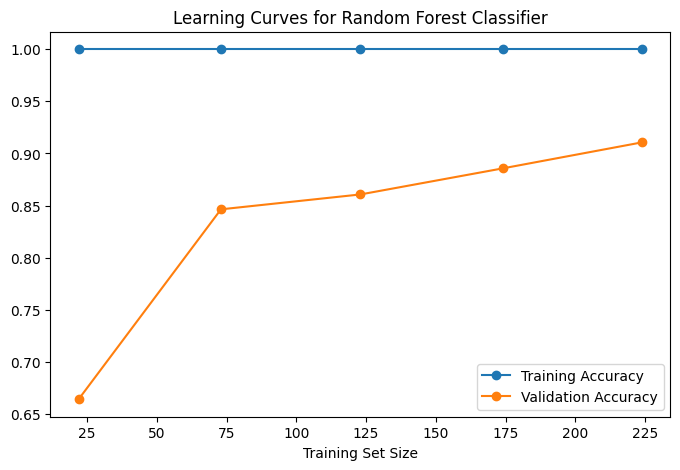

In [43]:

train_sizes, train_scores, val_scores = learning_curve(model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0])

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.legend()
plt.title('Learning Curves for Random Forest Classifier')
plt.show()


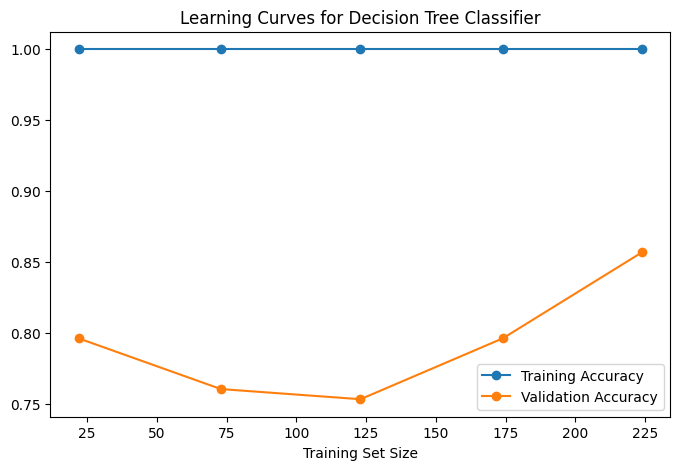

In [41]:

train_sizes, train_scores, val_scores = learning_curve(model, x_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=[0.1, 0.33, 0.55, 0.78, 1.0])

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)


plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, val_mean, label='Validation Accuracy', marker='o')
plt.xlabel('Training Set Size')
plt.legend()
plt.title('Learning Curves for Decision Tree Classifier')
plt.show()
